# QUESTION 1 

In [579]:
import math 
import matplotlib.pyplot as plt
import pandas as pd

paper_thickness = 1 #Initial thickness of paper in millimeter
heigh_of_mountain_everest = 8848000 #heigh of mountain evereste converted in millimeter
folds = 0 #initial the number of fold is zero
for n in range(1,8848000):   #supposing n represent the number of folds which could be any number between 1 and heigh of mountain evereste
    if paper_thickness < heigh_of_mountain_everest:
        folds +=1   #as we fold the number of fold increase by one
        paper_thickness *=2 # as we fold thickness of paper doubles itself
        if paper_thickness >= heigh_of_mountain_everest :
         print("the needed number of fold is" , folds)

the needed number of fold is 24


# QUESTION 2

In [580]:
# The volume of water in a reservoir decreases at an exponential
# rate, following v(t) = v(0)exp(-at) with a=0.1. How much time, t,
# does it take for the volume to decrease to less than one half of its
# initial volume, v(0)?

# given
# function v(t) = v(0)exp(-at)
# v is volume , t is time , a is a constant

a = 0.1
# asked ti find how much time does it take for the volume to decrease to less than one half of its initial volume, v(0)
# v(o) means that time t= 0 
# at initial volume v(t) = v(0)/2
# by replacing v(t) with v(0)/2 in v(t) = v(0)exp(-at)
# v(0)/2 = v(0)exp(-at)
# assumming that v(0) is greater than zero , and divide by v(0) on both sides
# 1/2 = exp(-at)
# now to get the value of t , let's apply ln on both sides
# log(1/2) = -atlog(e)
t=math.log(1/2) / (-a*math.log(math.e))     
t


6.931471805599452

# QUESTION 3

In [581]:

# A	=	final amount
# P	=	initial principal balance
# r	=	interest rate
# n	=	number of times interest applied per time period
# t	=	number of time periods elapsed


initial_deposit = 100  #initial deposited amout or initial principle balance
anual_interest_rate = 0.05 # interest rate on percentage 5%
n=1 #number of times interest applied per time period
# t	=	number of time periods elapsed

# the final amout after certain year
# A = initial_deposit (1 + anual_interest_rate/n) ** n*t 

for t in range (1,6):
    A = round((initial_deposit * (1+anual_interest_rate/n)**(n*t)))
    print(f"Amount in year {t} : {A}")

Amount in year 1 : 105
Amount in year 2 : 110
Amount in year 3 : 116
Amount in year 4 : 122
Amount in year 5 : 128


# QUESTION 4

In [582]:
# P= (r*PV)/(1-(1+r)**-n)
PV=20000
r=0.01
n=0
for i in range(1,4):
    n=n+12
    A = round((PV * r * ((1+r)** n)) / (((1+r)**n)-1))
    print(f"Monthly payment for year {i} : $ {A}")

Monthly payment for year 1 : $ 1777
Monthly payment for year 2 : $ 941
Monthly payment for year 3 : $ 664


# QUESTION 5

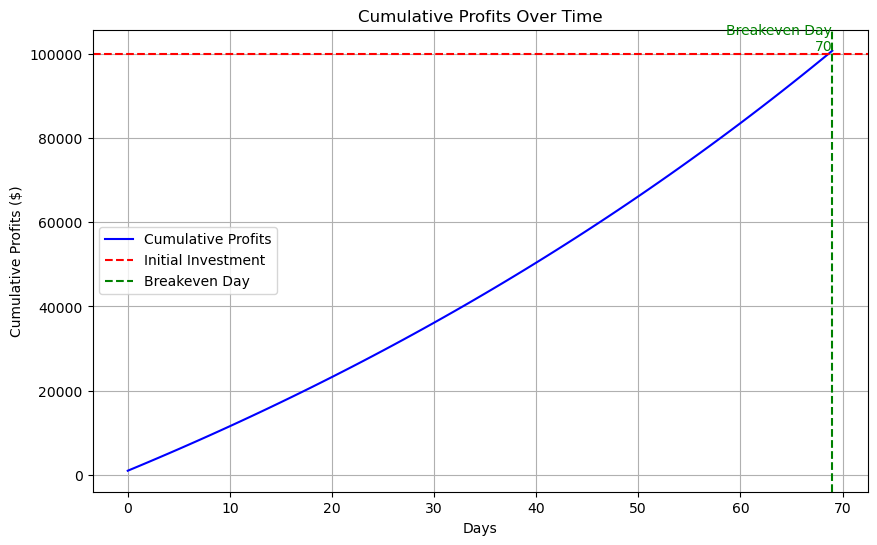

It will take 70 days to repay the initial investment.


In [583]:


# Define parameters
initial_investment = 100000
initial_customers = 100
growth_rate = 0.01  # 1% growth per day
profit_per_customer = 10

# Initialize variables
day = 0
cumulative_profits = 0
daily_customers = initial_customers
daily_profits = []

# Calculate daily profits and cumulative profits
while cumulative_profits < initial_investment:
    daily_profit = daily_customers * profit_per_customer
    cumulative_profits += daily_profit
    daily_profits.append(cumulative_profits)
    daily_customers *= (1 + growth_rate)
    day += 1

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(day), daily_profits, label='Cumulative Profits', color='blue')
plt.axhline(y=initial_investment, color='red', linestyle='--', label='Initial Investment')
plt.axvline(x=day-1, color='green', linestyle='--', label='Breakeven Day')

# Annotate the breakeven day
plt.text(day-1, initial_investment, f'Breakeven Day\n{day}', 
         horizontalalignment='right', verticalalignment='bottom',
         color='green')

plt.title('Cumulative Profits Over Time')
plt.xlabel('Days')
plt.ylabel('Cumulative Profits ($)')
plt.legend()
plt.grid(True)
plt.show()

# Output the breakeven day
print(f'It will take {day} days to repay the initial investment.')


# QUESTION 6

       Date  Cases  Death  Diff  Noofdays
0  22/03/14     49     29     2         1
1  24/03/14     86     59     1         3
2  25/03/14     86     60     1         4
3  26/03/14     86     62     1         5
4  27/03/14    111     72     1         6


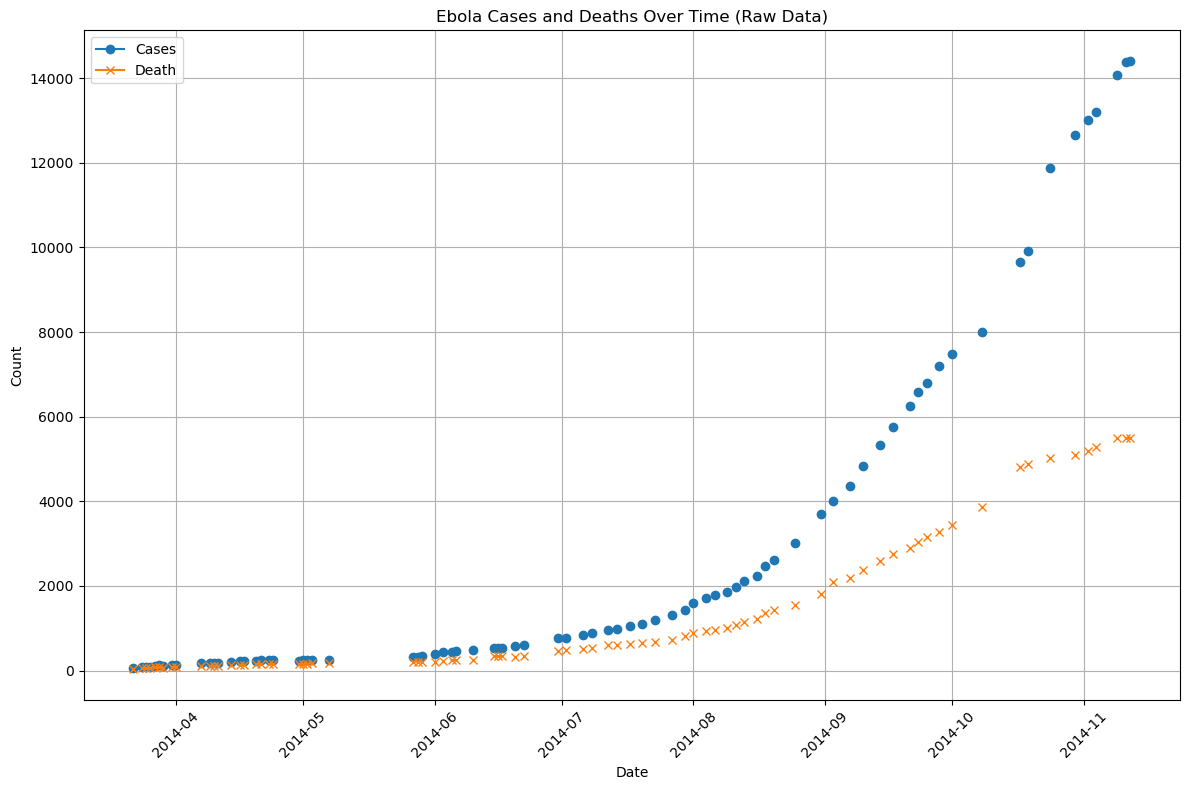

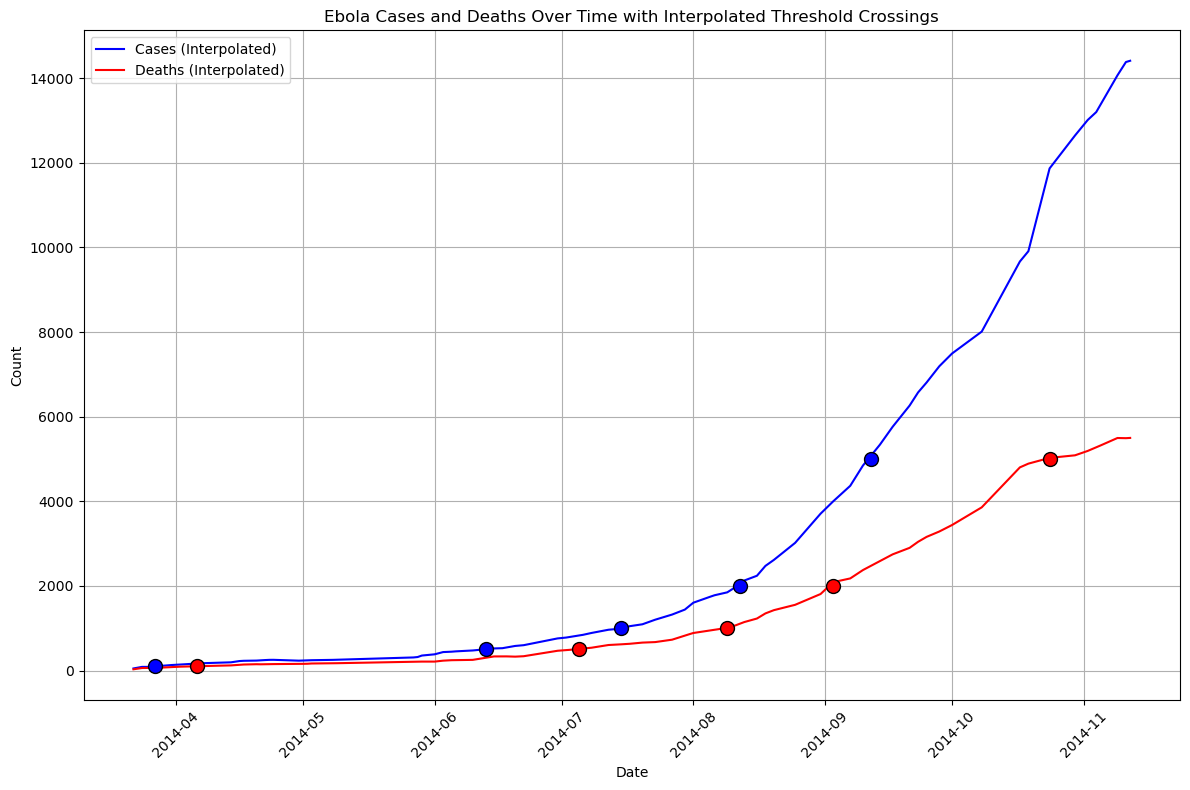

Dates when cases exceeded thresholds:
Cases > 100: 27/03/14
Cases > 500: 13/06/14
Cases > 1000: 15/07/14
Cases > 2000: 12/08/14
Cases > 5000: 12/09/14

Dates when deaths exceeded thresholds:
Deaths > 100: 06/04/14
Deaths > 500: 05/07/14
Deaths > 1000: 09/08/14
Deaths > 2000: 03/09/14
Deaths > 5000: 24/10/14


In [584]:


# Load the dataset
df = pd.read_csv("ebola_download.csv")
print(df.head())
# Select Date, Cases, and Death columns
df_selected = df[['Date', 'Cases', 'Death']].copy()

# Convert the Date column to datetime with the specified format
df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%d/%m/%y')

# Create a date range from the minimum to the maximum date in the dataset
full_date_range = pd.date_range(start=df_selected['Date'].min(), end=df_selected['Date'].max())

# Reindex the DataFrame to include all dates, filling missing dates with NaN
df_complete = df_selected.set_index('Date').reindex(full_date_range).rename_axis('Date').reset_index()
df_complete.to_csv('ebola_data_complete.csv', index=False)
# Plot the raw data
plt.figure(figsize=(12, 8))
plt.plot(df_complete['Date'], df_complete['Cases'], label='Cases', marker='o', linestyle='-')
plt.plot(df_complete['Date'], df_complete['Death'], label='Death', marker='x', linestyle='-')

# Adding titles and labels for the raw data plot
plt.title('Ebola Cases and Deaths Over Time (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the raw data plot
plt.show()

# Perform linear interpolation to fill the missing values
df_complete['Cases'] = df_complete['Cases'].interpolate(method='linear')
df_complete['Death'] = df_complete['Death'].interpolate(method='linear')
df_complete.to_csv('ebola_data_complete_interpolated.csv', index=False)

# Define thresholds
thresholds = [100, 500, 1000, 2000, 5000]

# Initialize dictionaries to store the dates when thresholds are exceeded
exceed_dates_cases = {}
exceed_dates_deaths = {}

# Find the dates when the cases and deaths exceed each threshold
for threshold in thresholds:
    # For cases
    exceed_date_cases = df_complete[df_complete['Cases'] >= threshold].iloc[0]['Date']
    exceed_dates_cases[threshold] = exceed_date_cases

    # For deaths
    exceed_date_deaths = df_complete[df_complete['Death'] >= threshold].iloc[0]['Date']
    exceed_dates_deaths[threshold] = exceed_date_deaths

# Plot the interpolated data with thresholds
plt.figure(figsize=(12, 8))

# Plot Cases and Deaths with interpolation
plt.plot(df_complete['Date'], df_complete['Cases'], label='Cases (Interpolated)',  color='blue')
plt.plot(df_complete['Date'], df_complete['Death'], label='Deaths (Interpolated)',  color='red')

# Mark the threshold crossing dates with circles
for threshold, date in exceed_dates_cases.items():
    plt.scatter(date, threshold, color='blue', marker='o', s=100, edgecolor='black', zorder=5, label=f'Cases >= {threshold}' if threshold not in exceed_dates_cases else "")

for threshold, date in exceed_dates_deaths.items():
    plt.scatter(date, threshold, color='red', marker='o', s=100, edgecolor='black', zorder=5, label=f'Deaths >= {threshold}' if threshold not in exceed_dates_deaths else "")

# Adding titles and labels for the interpolated data plot
plt.title('Ebola Cases and Deaths Over Time with Interpolated Threshold Crossings')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the interpolated data plot
plt.show()

# Print the dates when thresholds were exceeded
print("Dates when cases exceeded thresholds:")
for threshold, date in exceed_dates_cases.items():
    print(f"Cases > {threshold}: {date.strftime('%d/%m/%y')}")

print("\nDates when deaths exceeded thresholds:")
for threshold, date in exceed_dates_deaths.items():
    print(f"Deaths > {threshold}: {date.strftime('%d/%m/%y')}")



# QUESTION 7

In [585]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ebola_data_complete_interpolated.csv")

# Select Date, Cases, and Death columns
df_selected = df[['Date', 'Cases', 'Death']]

# Convert the Date column to datetime with the specified format
# df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%d/%m/%y')

# Sort data by Date to ensure calculations are done in chronological order
df_selected = df_selected.sort_values(by='Date')

# Calculate daily growth rate for Cases and Deaths
df_selected['Cases_Growth_Rate'] = df_selected['Cases'].pct_change() * 100
df_selected['Death_Growth_Rate'] = df_selected['Death'].pct_change() * 100

# Calculate average growth rate
average_growth_rate_cases = df_selected['Cases_Growth_Rate'].mean()
average_growth_rate_deaths = df_selected['Death_Growth_Rate'].mean()

print(f"Average daily growth rate for cases: {average_growth_rate_cases:.2f}%")
print(f"Average daily growth rate for deaths: {average_growth_rate_deaths:.2f}%")





Average daily growth rate for cases: 2.51%
Average daily growth rate for deaths: 2.33%


# QUESTION 8

Average ratio of Ebola deaths to cases: 0.56


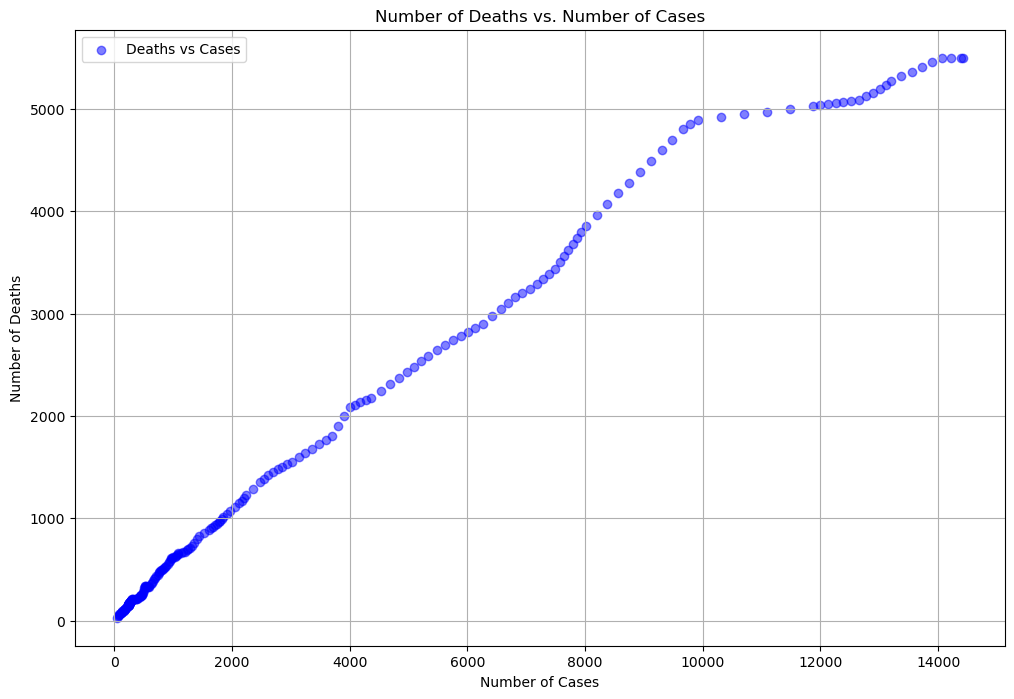

In [586]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("ebola_data_complete_interpolated.csv")

# Select Date, Cases, and Death columns
df_selected = df[['Date', 'Cases', 'Death']]

# Convert the Date column to datetime with the specified format
# df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%d/%m/%y')

# Sort data by Date to ensure chronological order
df_selected = df_selected.sort_values(by='Date')

# Calculate the ratio of deaths to cases
df_selected['Death_to_Cases_Ratio'] = df_selected['Death'] / df_selected['Cases']
df_selected['Death_to_Cases_Ratio'] = df_selected['Death_to_Cases_Ratio'].replace([float('inf'), -float('inf')], pd.NA)  # Handle infinities

# Estimate the average ratio
average_ratio = df_selected['Death_to_Cases_Ratio'].mean()

print(f"Average ratio of Ebola deaths to cases: {average_ratio:.2f}")

# Plot the number of deaths versus the number of cases
plt.figure(figsize=(12, 8))
plt.scatter(df_selected['Cases'], df_selected['Death'], label='Deaths vs Cases', color='blue', alpha=0.5)
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths vs. Number of Cases')
plt.grid(True)
plt.legend()
plt.show()


# QUESTION 9

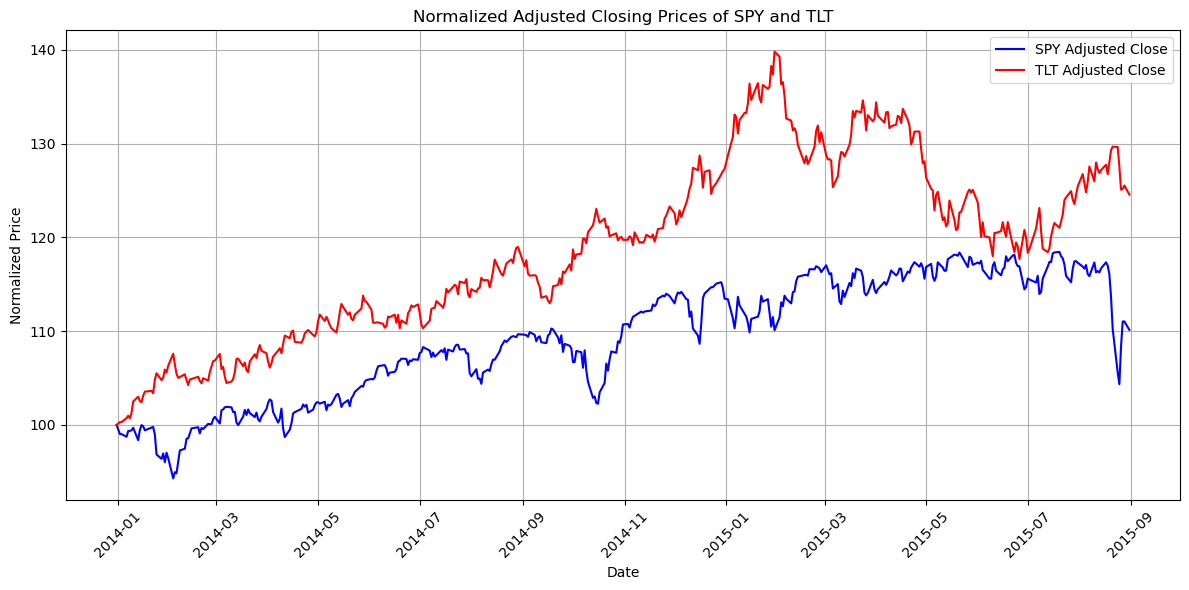

In [587]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
spy_df = pd.read_csv("SPY.csv") 
tlt_df = pd.read_csv("TLT.csv") 

# Convert 'Date' column to datetime
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
tlt_df['Date'] = pd.to_datetime(tlt_df['Date'])

# Filter the date range
start_date = '2013-12-31'
end_date = '2015-08-31'
spy_df = spy_df[(spy_df['Date'] >= start_date) & (spy_df['Date'] <= end_date)]
tlt_df = tlt_df[(tlt_df['Date'] >= start_date) & (tlt_df['Date'] <= end_date)]

# Select the 'Adj Close' columns and set the 'Date' column as the index
spy_adj_close = spy_df[['Date', 'Adj Close']].set_index('Date')
tlt_adj_close = tlt_df[['Date', 'Adj Close']].set_index('Date')

# Normalize the adjusted closing prices to start at $100
initial_spy_price = spy_adj_close['Adj Close'].iloc[0]
initial_tlt_price = tlt_adj_close['Adj Close'].iloc[0]
spy_adj_close['Normalized'] = 100 * spy_adj_close['Adj Close'] / initial_spy_price
tlt_adj_close['Normalized'] = 100 * tlt_adj_close['Adj Close'] / initial_tlt_price

# Plot the normalized prices
plt.figure(figsize=(12, 6))
plt.plot(spy_adj_close.index, spy_adj_close['Normalized'], label='SPY Adjusted Close', color='blue')
plt.plot(tlt_adj_close.index, tlt_adj_close['Normalized'], label='TLT Adjusted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Adjusted Closing Prices of SPY and TLT')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# QUESTION 10

In [588]:
import pandas as pd

# Load the datasets
spy_df = pd.read_csv("SPY.csv")  # replace with actual file path
tlt_df = pd.read_csv("TLT.csv")  # replace with actual file path

# Convert 'Date' column to datetime
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
tlt_df['Date'] = pd.to_datetime(tlt_df['Date'])

# Filter the date range
start_date = '2013-12-31'
end_date = '2015-08-31'
spy_df = spy_df[(spy_df['Date'] >= start_date) & (spy_df['Date'] <= end_date)]
tlt_df = tlt_df[(tlt_df['Date'] >= start_date) & (tlt_df['Date'] <= end_date)]

# Select the 'Adj Close' columns and set the 'Date' column as the index
spy_adj_close = spy_df[['Date', 'Adj Close']].set_index('Date')
tlt_adj_close = tlt_df[['Date', 'Adj Close']].set_index('Date')

# Calculate daily returns
spy_adj_close['Daily Return'] = spy_adj_close['Adj Close'].pct_change()
tlt_adj_close['Daily Return'] = tlt_adj_close['Adj Close'].pct_change()

# Calculate statistics
spy_mean_return = spy_adj_close['Daily Return'].mean() * 100
spy_min_return = spy_adj_close['Daily Return'].min() * 100
spy_max_return = spy_adj_close['Daily Return'].max() * 100

tlt_mean_return = tlt_adj_close['Daily Return'].mean() * 100
tlt_min_return = tlt_adj_close['Daily Return'].min() * 100
tlt_max_return = tlt_adj_close['Daily Return'].max() * 100

# Print statistics
print("SPY Daily Returns:")
print(f"Average Daily Return: {spy_mean_return:.2f}%")
print(f"Min Daily Return: {spy_min_return:.2f}%")
print(f"Max Daily Return: {spy_max_return:.2f}%\n")

print("TLT Daily Returns:")
print(f"Average Daily Return: {tlt_mean_return:.2f}%")
print(f"Min Daily Return: {tlt_min_return:.2f}%")
print(f"Max Daily Return: {tlt_max_return:.2f}%")


SPY Daily Returns:
Average Daily Return: 0.03%
Min Daily Return: -4.21%
Max Daily Return: 3.84%

TLT Daily Returns:
Average Daily Return: 0.06%
Min Daily Return: -2.43%
Max Daily Return: 2.65%
